In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import datetime
import glob
import requests, json 

In [2]:
# Pulling all of the names of the csv files
filelist = glob.glob('./Resources/*.csv')
filelist

['./Resources\\April_2017.csv',
 './Resources\\August_2017.csv',
 './Resources\\December_2017.csv',
 './Resources\\February_2017.csv',
 './Resources\\January_2017.csv',
 './Resources\\July_2017.csv',
 './Resources\\June_2017.csv',
 './Resources\\March_2017.csv',
 './Resources\\May_2017.csv',
 './Resources\\November_2017.csv',
 './Resources\\October_2017.csv',
 './Resources\\September_2017.csv']

In [3]:
# Pulling the names of the columns
f = open(filelist[0])
columns = f.readline()
columns = columns.strip().split(',')
print(columns)

# There's a weird symbol in front of the column "X", so changing the name.
columns[0] = 'X'
print(columns)
f.close()

['ï»¿X', 'Y', 'OBJECTID', 'ROWID_', 'DAY_OF_WEEK', 'HOLIDAY', 'WEEK_OF_YEAR', 'MONTH_OF_YEAR', 'ISSUE_TIME', 'VIOLATION_CODE', 'VIOLATION_DESCRIPTION', 'LOCATION', 'RP_PLATE_STATE', 'BODY_STYLE', 'ADDRESS_ID', 'STREETSEGID', 'XCOORD', 'YCOORD', 'TICKET_ISSUE_DATE']
['X', 'Y', 'OBJECTID', 'ROWID_', 'DAY_OF_WEEK', 'HOLIDAY', 'WEEK_OF_YEAR', 'MONTH_OF_YEAR', 'ISSUE_TIME', 'VIOLATION_CODE', 'VIOLATION_DESCRIPTION', 'LOCATION', 'RP_PLATE_STATE', 'BODY_STYLE', 'ADDRESS_ID', 'STREETSEGID', 'XCOORD', 'YCOORD', 'TICKET_ISSUE_DATE']


In [4]:
# Adding a column called season to organize the data by seasons
columns += ['SEASON']

# Create an empty dataframe with our columns
master_df = pd.DataFrame(columns = columns)

# For all of the filenames:
for filename in filelist:
    # Read csv
    month_csv = pd.read_csv(filename)
    # Convert the csv read into a dataframe
    month_df = pd.DataFrame(month_csv)
    # Add the appropriate season name based off of the month in the filename
    if "April" in filename or "March" in filename or "May" in filename:
        month_df["SEASON"] = "Spring"
    elif "January" in filename or "February" in filename or "December" in filename:
        month_df["SEASON"] = "Winter"
    elif "June" in filename or "July" in filename or "August" in filename:
        month_df["SEASON"] = "Summer"
    elif "September" in filename or "October" in filename or "November" in filename:
        month_df["SEASON"] = "Fall"
    else:
        month_df["SEASON"] = "Oh no!"
    # Concatenating the month_df created for each month to our master dataframe
    master_df = pd.concat([master_df, month_df], axis=0, sort=False)

In [5]:
# There are several empty columns in our newly created dataframe
master_df.head()

,X,Y,OBJECTID,ROWID_,DAY_OF_WEEK,HOLIDAY,WEEK_OF_YEAR,MONTH_OF_YEAR,ISSUE_TIME,VIOLATION_CODE,VIOLATION_DESCRIPTION,LOCATION,RP_PLATE_STATE,BODY_STYLE,ADDRESS_ID,STREETSEGID,XCOORD,YCOORD,TICKET_ISSUE_DATE,SEASON
0,-76.990896,38.892807,2750258,NaN,NaN,NaN,NaN,NaN,NaN,P050,PARKED WITHIN 25 FEET OF A STOP SIGN,1100 BLOCK PARK ST NE NORTH SIDE,VA,NaN,801357,1321.0,400790,136106,2017-04-24T08:36:00.000Z,Spring
1,-76.980569,38.888851,2750259,NaN,NaN,NaN,NaN,NaN,NaN,P002,STAND OR PARK IN ALLEY,SIDE OF 1700 A ST SE SOUTH SIDE,DC,NaN,57985,13169.0,401686,135667,2017-04-24T10:26:00.000Z,Spring
2,-76.980569,38.888851,2750260,NaN,NaN,NaN,NaN,NaN,NaN,P170,FAILURE TO DISPLAY CURRENT TAGS,SIDE OF 1700 A ST SE SOUTH SIDE,DC,NaN,57985,13169.0,401686,135667,2017-04-24T10:28:00.000Z,Spring
3,-76.979301,38.888518,2750261,NaN,NaN,NaN,NaN,NaN,NaN,P303,RESERVED RESIDENTIAL SPACE PERSONS W/ DISABILTIES,FRONT OF 1753 A ST SE SOUTH SIDE,DC,NaN,56532,13169.0,401796,135630,2017-04-24T10:33:00.000Z,Spring
4,-76.981491,38.888680,2750262,NaN,NaN,NaN,NaN,NaN,NaN,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,1700 BLOCK A ST SE NORTH SIDE,VA,NaN,802308,2993.0,401606,135648,2017-04-24T12:23:00.000Z,Spring


In [6]:
master_df.tail()

,X,Y,OBJECTID,ROWID_,DAY_OF_WEEK,HOLIDAY,WEEK_OF_YEAR,MONTH_OF_YEAR,ISSUE_TIME,VIOLATION_CODE,VIOLATION_DESCRIPTION,LOCATION,RP_PLATE_STATE,BODY_STYLE,ADDRESS_ID,STREETSEGID,XCOORD,YCOORD,TICKET_ISSUE_DATE,SEASON
107062,-77.084585,38.958538,3661280,NaN,NaN,NaN,NaN,NaN,NaN,P039,PARK AT EXPIRED METER,5300 BLOCK WISCONSIN AVE NW EAST*,IN,NaN,805492,4712.0,392669,143406,2017-09-12T20:39:00.000Z,Fall
107063,-77.083544,38.956493,3661281,NaN,NaN,NaN,NaN,NaN,NaN,P039,PARK AT EXPIRED METER,5100 BLOCK WISCONSIN AVE NW EAST*,DC,NaN,800499,422.0,392759,143179,2017-09-12T21:18:00.000Z,Fall
107064,-77.083544,38.956493,3661282,NaN,NaN,NaN,NaN,NaN,NaN,P039,PARK AT EXPIRED METER,5100 BLOCK WISCONSIN AVE NW EAST*,DC,NaN,800499,422.0,392759,143179,2017-09-12T21:19:00.000Z,Fall
107065,-77.081625,38.952720,3661283,NaN,NaN,NaN,NaN,NaN,NaN,P039,PARK AT EXPIRED METER,4900 BLOCK WISCONSIN AVE NW WEST*,MD,NaN,801267,1245.0,392925,142760,2017-09-12T21:24:00.000Z,Fall
107066,-77.081625,38.952720,3661284,NaN,NaN,NaN,NaN,NaN,NaN,P039,PARK AT EXPIRED METER,4900 BLOCK WISCONSIN AVE NW WEST*,VA,NaN,801267,1245.0,392925,142760,2017-09-12T21:26:00.000Z,Fall


In [7]:
# Additionally there are also other columns missing data
master_df.count()

X                        1404052
Y                        1404052
OBJECTID                 1404052
ROWID_                    174954
DAY_OF_WEEK                    0
HOLIDAY                        0
WEEK_OF_YEAR                   0
MONTH_OF_YEAR                  0
ISSUE_TIME                     0
VIOLATION_CODE           1404052
VIOLATION_DESCRIPTION    1389544
LOCATION                 1404052
RP_PLATE_STATE           1393022
BODY_STYLE                173700
ADDRESS_ID               1404052
STREETSEGID              1398855
XCOORD                   1404052
YCOORD                   1404052
TICKET_ISSUE_DATE        1404052
SEASON                   1404052
dtype: int64

In [8]:
# We dropped all the empty columns as well as ROW_ID and BODY_STYLE, which were missing a significant chunk of the data
master_df = master_df.drop(["ROWID_", "DAY_OF_WEEK", "HOLIDAY", "WEEK_OF_YEAR", "MONTH_OF_YEAR", "ISSUE_TIME", "BODY_STYLE"], axis = 1)

In [9]:
# Dropping all rows with missing data. We're left with 1,373,343 items
master_df = master_df.dropna(how='any')
master_df.count()

X                        1373343
Y                        1373343
OBJECTID                 1373343
VIOLATION_CODE           1373343
VIOLATION_DESCRIPTION    1373343
LOCATION                 1373343
RP_PLATE_STATE           1373343
ADDRESS_ID               1373343
STREETSEGID              1373343
XCOORD                   1373343
YCOORD                   1373343
TICKET_ISSUE_DATE        1373343
SEASON                   1373343
dtype: int64

In [10]:
# Cleaning up the date column so that it only includes the date
master_df["TICKET_ISSUE_DATE"] = master_df["TICKET_ISSUE_DATE"].map(lambda date : date[:-14])

# Create a new column (Month) so that we'll be able to count the number of items per month
master_df["MONTH"] = master_df["TICKET_ISSUE_DATE"].map(lambda date : datetime.datetime.strptime(date, '%Y-%m-%d').strftime('%B'))

# Converting the date into day of the week into a new column
master_df["DAY_OF_WEEK"] = master_df["TICKET_ISSUE_DATE"].map(lambda date : datetime.datetime.strptime(date, '%Y-%m-%d').strftime('%a'))

master_df.head()

,X,Y,OBJECTID,VIOLATION_CODE,VIOLATION_DESCRIPTION,LOCATION,RP_PLATE_STATE,ADDRESS_ID,STREETSEGID,XCOORD,YCOORD,TICKET_ISSUE_DATE,SEASON,MONTH,DAY_OF_WEEK
0,-76.990896,38.892807,2750258,P050,PARKED WITHIN 25 FEET OF A STOP SIGN,1100 BLOCK PARK ST NE NORTH SIDE,VA,801357,1321.0,400790,136106,2017-04-24,Spring,April,Mon
1,-76.980569,38.888851,2750259,P002,STAND OR PARK IN ALLEY,SIDE OF 1700 A ST SE SOUTH SIDE,DC,57985,13169.0,401686,135667,2017-04-24,Spring,April,Mon
2,-76.980569,38.888851,2750260,P170,FAILURE TO DISPLAY CURRENT TAGS,SIDE OF 1700 A ST SE SOUTH SIDE,DC,57985,13169.0,401686,135667,2017-04-24,Spring,April,Mon
3,-76.979301,38.888518,2750261,P303,RESERVED RESIDENTIAL SPACE PERSONS W/ DISABILTIES,FRONT OF 1753 A ST SE SOUTH SIDE,DC,56532,13169.0,401796,135630,2017-04-24,Spring,April,Mon
4,-76.981491,38.888680,2750262,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,1700 BLOCK A ST SE NORTH SIDE,VA,802308,2993.0,401606,135648,2017-04-24,Spring,April,Mon


## Obtaining Weather Data ##

In [11]:
# We are using data from the National Climatic Data Center
# https://www.ncdc.noaa.gov/cdo-web/webservices/v2 for documentation

# Import api token
from config import token

In [12]:
# We are using the Global Summary of Month (GSOM) for the National Arboretum in DC 
# (the only station that has complete GSOM data for 2017)
# https://www.ncdc.noaa.gov/cdo-web/datasets/GSOM/stations/GHCND:USC00186350/detail
# https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/gsom-gsoy_documentation.pdf for the documentation

# Specify start and end date
start_date = "2017-01-01"
end_date = "2017-12-31"

# Specify which data types we want
# TMAX: Monthly Maximum Temperature - average of montly maximum temperature
# TAVG: Average Monthly Temperature
# PRCP: Total Monthly Precipitation (inches)
data_type_ids = ["TMAX", "TAVG", "PRCP"]

# Station ID for the National Arboretum
station_id = "GHCND:USC00186350"

In [13]:
# Building our url
base_url = f'https://www.ncdc.noaa.gov/cdo-web/api/v2/data?'
url = f'{base_url}datasetid=GSOM&stationid={station_id}&stationid&units=standard&startdate={start_date}&enddate={end_date}&includemetadata=false&limit=50&datatypeid={data_type_ids[0]}&datatypeid={data_type_ids[1]}&datatypeid={data_type_ids[2]}'

headers = {'token': token}

# Making our request
response = requests.get(url, headers=headers).json()
print(json.dumps(response, indent = 4 ))

{
    "results": [
        {
            "date": "2017-01-01T00:00:00",
            "datatype": "PRCP",
            "station": "GHCND:USC00186350",
            "attributes": ",,,7",
            "value": 3.01
        },
        {
            "date": "2017-01-01T00:00:00",
            "datatype": "TAVG",
            "station": "GHCND:USC00186350",
            "attributes": ",7",
            "value": 41.2
        },
        {
            "date": "2017-01-01T00:00:00",
            "datatype": "TMAX",
            "station": "GHCND:USC00186350",
            "attributes": ",,,7",
            "value": 48.0
        },
        {
            "date": "2017-02-01T00:00:00",
            "datatype": "PRCP",
            "station": "GHCND:USC00186350",
            "attributes": "1,,,7",
            "value": 0.39
        },
        {
            "date": "2017-02-01T00:00:00",
            "datatype": "TAVG",
            "station": "GHCND:USC00186350",
            "attributes": "1,7",
            "value":

In [14]:
# Our JSON response is within a nested dictionary called "results"
# Pulling only the values within "results", resulting in a list of dictionaries
response = response["results"]
print(json.dumps(response, indent = 4 ))

[
    {
        "date": "2017-01-01T00:00:00",
        "datatype": "PRCP",
        "station": "GHCND:USC00186350",
        "attributes": ",,,7",
        "value": 3.01
    },
    {
        "date": "2017-01-01T00:00:00",
        "datatype": "TAVG",
        "station": "GHCND:USC00186350",
        "attributes": ",7",
        "value": 41.2
    },
    {
        "date": "2017-01-01T00:00:00",
        "datatype": "TMAX",
        "station": "GHCND:USC00186350",
        "attributes": ",,,7",
        "value": 48.0
    },
    {
        "date": "2017-02-01T00:00:00",
        "datatype": "PRCP",
        "station": "GHCND:USC00186350",
        "attributes": "1,,,7",
        "value": 0.39
    },
    {
        "date": "2017-02-01T00:00:00",
        "datatype": "TAVG",
        "station": "GHCND:USC00186350",
        "attributes": "1,7",
        "value": 45.7
    },
    {
        "date": "2017-02-01T00:00:00",
        "datatype": "TMAX",
        "station": "GHCND:USC00186350",
        "attributes": "1,,,

In [15]:
# Creating a dataframe from the data obtained from our API
temp_max = []
temp_avg = []
prcp = []
date = []

for result in response:
    if result["datatype"] == "PRCP":
        prcp.append(result["value"])
    if result["datatype"] == "TAVG":
        temp_avg.append(result["value"])
    if result["datatype"] == "TMAX":
        temp_max.append(result["value"])
        date.append(result["date"][:-9])
        
temp = {"Date" : date, "Average Temperature (F)" : temp_avg, "Average Maximum Temperature (F)" : temp_max, "Precipitation (Inches)" : prcp}

# Converting the numerical dates to the months
temp_df = pd.DataFrame(temp)
temp_df["Date"] = temp_df["Date"].map(lambda day : datetime.datetime.strptime(day, '%Y-%m-%d').strftime('%B'))

temp_df

,Date,Average Temperature (F),Average Maximum Temperature (F),Precipitation (Inches)
0,January,41.2,48.0,3.01
1,February,45.7,56.9,0.39
2,March,45.2,55.8,3.06
3,April,62.0,72.3,3.81
4,May,64.6,73.9,6.89
5,June,75.9,85.8,1.41
6,July,81.0,90.4,10.22
7,August,76.8,85.6,4.67
8,September,71.0,80.7,2.19
9,October,63.4,73.4,2.55


## Organizing Data by Month ##

In [16]:
# Creating a month list
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
              'October', 'November', 'December']

In [17]:
# Creating a dataframe
# Total violations per month
month_df = pd.DataFrame(master_df["MONTH"].value_counts())
month_df = month_df.reindex(month_list)
month_df.rename(columns = {"MONTH" : "Total Violations"}, inplace = True)
    
# Averaging the number of tickets per day of the month
#(Ex: (The number of entries of in January)/(The number of days January listed))
month_avg = []
for month in month_list:
    m_df = master_df.loc[master_df["MONTH"] == month, :]
    month_avg.append(len(m_df)/len(m_df.groupby("TICKET_ISSUE_DATE").count()))
month_df["Average Violations per Day"] = month_avg

month_df

,Total Violations,Average Violations per Day
January,167312,5397.161290
February,94145,3362.321429
March,114898,3706.387097
April,113275,3775.833333
May,124155,4005.000000
June,124200,4140.000000
July,104478,3370.258065
August,119075,3841.129032
September,105712,3523.733333
October,114844,3704.645161


## Organizing Data by Seasons and Day of Week ##

In [18]:
# Creating a week and seasons list
week_list = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
season_list = ["Spring", "Summer", "Fall", "Winter"]

In [19]:
season_all_df = pd.DataFrame(season_list, columns = ["Season"])
season_total = []
season_avg = []
for season in season_list:
    all_seasons_df = master_df.loc[master_df["SEASON"] == season]
    season_count = len(all_seasons_df)
    season_total.append(season_count)
    season_avg.append(season_count/len(all_seasons_df.groupby("TICKET_ISSUE_DATE").count()))

season_all_df["Total Violations"] = season_total
season_all_df["Average Violations per Day"] = season_avg
season_all_df.set_index("Season")

season_all_df

,Season,Total Violations,Average Violations per Day
0,Spring,352328,3829.652174
1,Summer,347753,3779.923913
2,Fall,321006,3527.538462
3,Winter,352256,3913.955556


In [20]:
# Creating a dataframe consisting of the total number of violations per day of the week
week_df = pd.DataFrame(master_df["DAY_OF_WEEK"].value_counts())
week_df = week_df.reindex(week_list)
week_df.rename(columns = {"DAY_OF_WEEK" : "Total Violations"}, inplace = True)

In [21]:
# For each item of the season list
for season in season_list:
    # Sort the master dataframe to only entries with the specified season
    season_df = master_df.loc[master_df["SEASON"] == season, :]
    
    # Count the values of all of the items for the day of the week under that season
    season_count_df = season_df["DAY_OF_WEEK"].value_counts()
    season_count_df = season_count_df.reindex(week_list)
    # Create a dataframe
    week_df[f'{season} Total'] = season_count_df
    
    # Create an empty dataframe to later append to
    season_avg = []
    # For each day of the week under each season
    for week in week_list:
        # Further sort the season dataframe to a specific day of the week
        season_day_df = season_df.loc[season_df["DAY_OF_WEEK"] == week, :]
        # Find the average of violations per day for that season
        # (Ex: (The number of entries of Mondays in Spring)/(The number of days in Spring listed))
        season_avg.append(len(season_day_df)/len(season_day_df.groupby("TICKET_ISSUE_DATE").count()))
    week_df[f'{season} Average per Day'] = season_avg

week_df

,Total Violations,Spring Total,Spring Average per Day,Summer Total,Summer Average per Day,Fall Total,Fall Average per Day,Winter Total,Winter Average per Day
Sun,24160,5672,436.307692,6645,511.153846,6063,466.384615,5780,412.857143
Mon,191426,50189,3860.692308,52604,4046.461538,46991,3614.692308,41642,3203.230769
Tue,263965,66139,5087.615385,60780,4675.384615,64592,4968.615385,72454,5573.384615
Wed,289812,77412,5529.428571,70078,5390.615385,67253,5173.307692,75069,6255.750000
Thu,276470,69790,5368.461538,72496,5178.285714,63654,4896.461538,70530,5877.500000
Fri,223880,57757,4442.846154,57261,4404.692308,47128,3625.230769,61734,4748.769231
Sat,103630,25369,1951.461538,27889,2145.307692,25325,1948.076923,25047,1926.692308


## Weather and Month ##

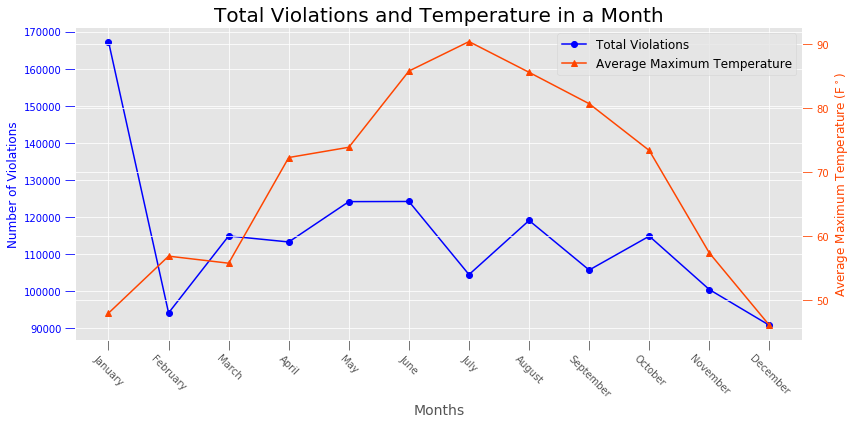

In [22]:
style.use('ggplot')

# Plot initial plot- Total Violations in the month
fig, ax1 = plt.subplots(figsize=(12,6))
month_count_leg, = ax1.plot(month_df["Total Violations"], marker = "o", color = "blue")

ax1.set_xlabel('Months', size = 14)

ax1.set_ylabel("Number of Violations", color='blue')
ax1.tick_params('y', colors='blue', size = 10)
ax1.tick_params('x', rotation = -45, size = 10)

# Adding a second y-axis
ax2 = ax1.twinx()
temp_leg, = ax2.plot(temp_df["Average Maximum Temperature (F)"], marker = "^", color = "orangered")
plt.legend(handles = [month_count_leg, temp_leg], labels = ["Total Violations", "Average Maximum Temperature"],
                      loc="best",prop={'size': 12})

ax2.set_ylabel('Average Maximum Temperature (F$^\circ$)', color='orangered')
ax2.tick_params('y', colors='orangered', size = 10)

plt.title("Total Violations and Temperature in a Month", size = 20)
plt.xticks(rotation = 45)

fig.tight_layout()
plt.savefig("Images/TotalViolations_and_Temp(Month).png")
plt.show()

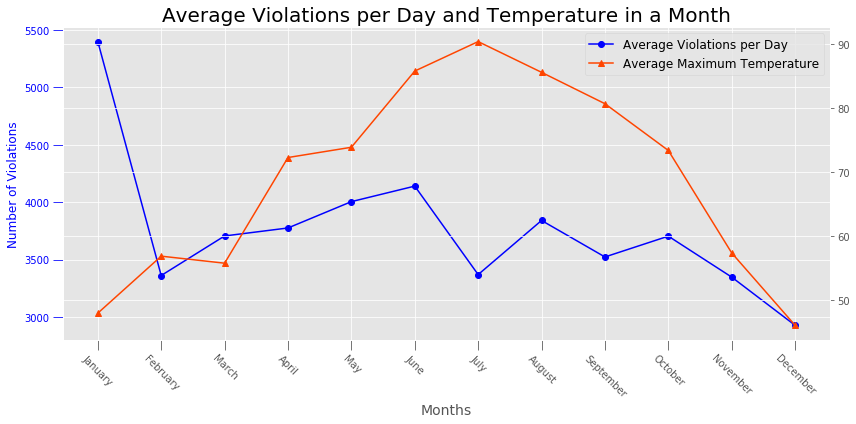

In [23]:
# Plotting Average Violations per Day 
fig, ax3 = plt.subplots(figsize=(12,6))
month_avg_leg, = ax3.plot(month_df["Average Violations per Day"], marker = "o", color = "blue")

ax3.set_xlabel('Months', size = 14)

ax3.set_ylabel("Number of Violations", color='blue')
ax3.tick_params('y', colors='blue', size = 10)
ax3.tick_params('x', rotation = -45, size = 10)

ax4 = ax3.twinx()
temp_leg, = ax4.plot(temp_df["Average Maximum Temperature (F)"], marker = "^", color = "orangered")
plt.legend(handles = [month_avg_leg, temp_leg], labels = ["Average Violations per Day", "Average Maximum Temperature"],
                      loc="best",prop={'size': 12})

ax2.set_ylabel('Average Maximum Temperature (F$^\circ$)', color='orangered')
ax2.tick_params('y', colors='orangered', size = 10)

plt.title("Average Violations per Day and Temperature in a Month", size = 20)
plt.xticks(rotation = 45)

fig.tight_layout()
plt.savefig("Images/AvgViolations_and_Temp(Month).png")
plt.show()

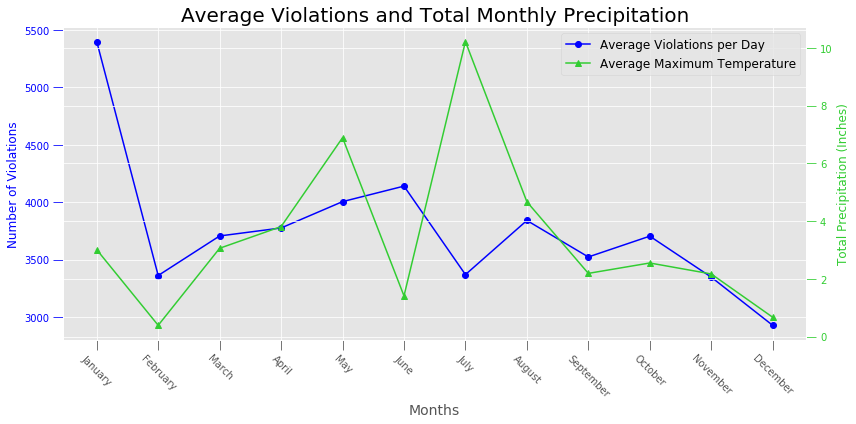

In [24]:
fig, ax3 = plt.subplots(figsize=(12,6))
month_avg_leg, = ax3.plot(month_df["Average Violations per Day"], marker = "o", color = "blue")

ax3.set_xlabel('Months', size = 14)

ax3.set_ylabel("Number of Violations", color='blue')
ax3.tick_params('y', colors='blue', size = 10)
ax3.tick_params('x', rotation = -45, size = 10)

ax4 = ax3.twinx()
temp_leg, = ax4.plot(temp_df["Precipitation (Inches)"], marker = "^", color = "limegreen")
plt.legend(handles = [month_avg_leg, temp_leg], labels = ["Average Violations per Day", "Average Maximum Temperature"],
                      loc="best",prop={'size': 12})

ax4.set_ylabel('Total Precipitation (Inches)', color='limegreen')
ax4.tick_params('y', colors='limegreen', size = 10)

plt.title("Average Violations and Total Monthly Precipitation", size = 20)
plt.xticks(rotation = 45)

fig.tight_layout()
plt.savefig("Images/AvgViolations_and_Prcp(Month).png")
plt.show()

In [25]:
# Pie Graph to show how much January takes up

labels = month_list

sizes = month_df["Total Violations"]

# The colors of each section of the pie chart
colors = ["darksalmon", "m", "lightskyblue", "lightpink", "green", "orchid", "red", "greenyellow", "blue",
          "deeppink", "gold", "dodgerblue"]

explode = (0.1, 0, 0, 0, 0, 0, 0, 0,0,0,0, 0) 

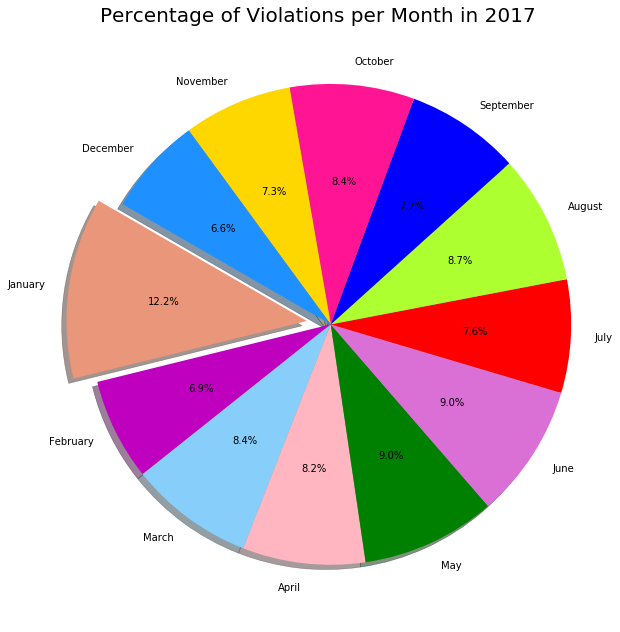

In [26]:
fig, ax = plt.subplots(figsize=(10,10))

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("equal")
plt.title("Percentage of Violations per Month in 2017", size = 20)
plt.tight_layout
fig.subplots_adjust(top=0.95)
plt.savefig("Images/Month_pie).png")
plt.show()

## Season and Day of Week ##

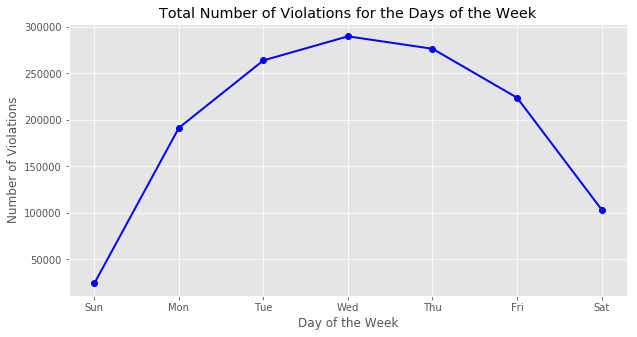

In [27]:
fig, ax = plt.subplots(figsize= (10, 5))

plt.plot(week_df.index, week_df["Total Violations"], marker = "o", alpha = 3, color = "blue", linewidth = 2)
plt.title("Total Number of Violations for the Days of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Violations")
plt.savefig("Images/TotalViolations_Days_of_the_week(Total).png")
plt.show()

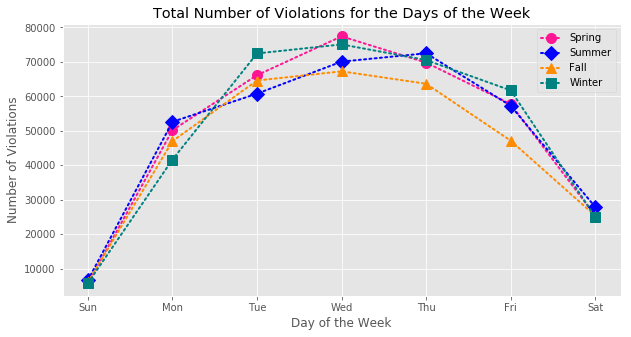

In [28]:
marker = ["o","D","^","s"]
colour = ["deeppink", "blue","darkorange", "teal"]

markers = dict(zip(season_list, marker))
colours = dict(zip(season_list, colour))

legend = {}
fig, ax = plt.subplots(figsize=(10, 5))   

for season in season_list:
    legend[season], = plt.plot(week_df.index, week_df[f'{season} Total'], marker = markers[season], alpha = 3, 
                          linestyle = ":", color = colours[season],dash_capstyle = "round", linewidth = 2, markersize = 10)

plt.legend(handles= legend.values(), labels = season_list, loc="best",prop={'size': 10})

plt.title("Total Number of Violations for the Days of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Violations")
plt.savefig("Images/Violations_Days_of_the_week.png")
plt.show()



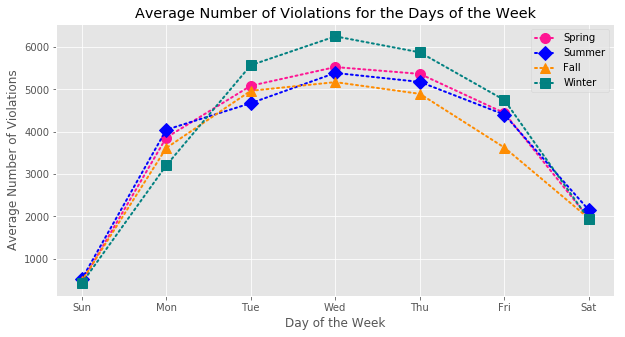

In [29]:
legend = {}
fig, ax = plt.subplots(figsize=(10, 5))   

for season in season_list:
    legend[season], = plt.plot(week_df.index, week_df[f'{season} Average per Day'], marker = markers[season], alpha = 3, 
                          linestyle = ":", color = colours[season],dash_capstyle = "round", linewidth = 2, markersize = 10)

plt.legend(handles= legend.values(), labels = season_list, loc="best",prop={'size': 10})

plt.title("Average Number of Violations for the Days of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Number of Violations")
plt.savefig("Images/AvgViolations_Days_of_the_week.png")
plt.show()

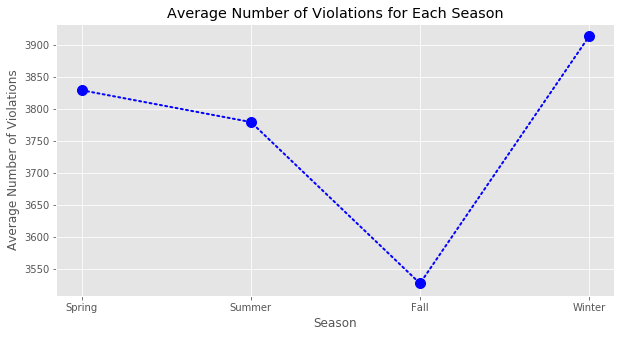

In [30]:
fig, ax = plt.subplots(figsize=(10, 5))   

legend, = plt.plot(season_list, season_all_df['Average Violations per Day'], marker = "o", alpha = 3, 
                          linestyle = ":", color = "blue",dash_capstyle = "round", linewidth = 2, markersize = 10)


plt.title("Average Number of Violations for Each Season")
plt.xlabel("Season")
plt.ylabel("Average Number of Violations")
plt.savefig("Images/Seasons_line.png")
plt.show()

In [31]:
labels = season_list

sizes = season_all_df["Total Violations"]

# The colors of each section of the pie chart
colors = ["deeppink", "blue","darkorange", "teal"]

explode = (0, 0, 0, 0) 

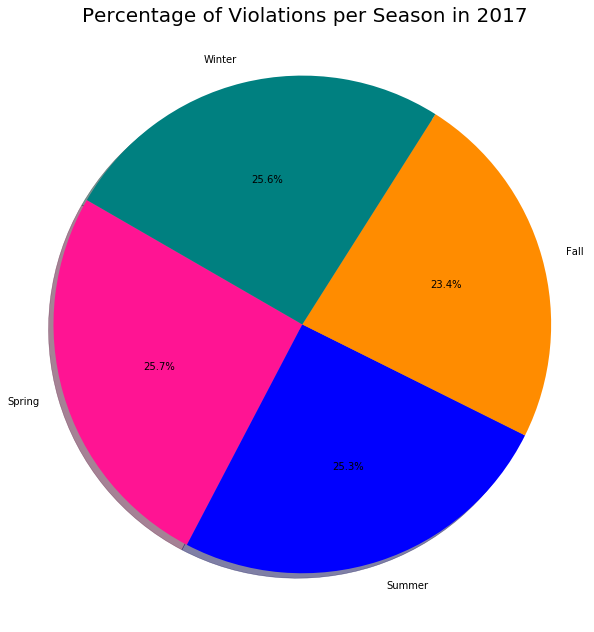

In [32]:
fig, ax = plt.subplots(figsize=(10,10))

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("equal")
plt.title("Percentage of Violations per Season in 2017", size = 20)
plt.tight_layout
fig.subplots_adjust(top=0.95)
plt.savefig("Images/Season_pie).png")
plt.show()

 ### Laura Code Here! ### 

In [ ]:
#Create DF for Top 10 Violations
csv_path = './Resources/Laura_Res/Top_10.csv'
Top_10_df = pd.read_csv(csv_path)
Top_10_df

In [ ]:
#Bar Chart Top 10 most ticketed violations 2017

#Legend Dictionary
legend = {}

#Bar Graph variables
Code = Top_10_df["Violation Code"]
Count = Top_10_df["Violation Count"]

#Style
style.use('ggplot')

#Graph Size
fig, ax = plt.subplots(figsize=(10, 5))

#Bar Graph bars
legend[Code[0]], = plt.bar(Code[0], Count[0], color = "steelblue")
legend[Code[1]], = plt.bar(Code[1], Count[1], color = "cornflowerblue")
legend[Code[2]], = plt.bar(Code[2], Count[2], color = "midnightblue")
legend[Code[3]], = plt.bar(Code[3], Count[3], color = "b")
legend[Code[4]], = plt.bar(Code[4], Count[4], color = "mediumslateblue")
legend[Code[5]], = plt.bar(Code[5], Count[5], color = "indigo")
legend[Code[6]], = plt.bar(Code[6], Count[6], color = "thistle")
legend[Code[7]], = plt.bar(Code[7], Count[7], color = "darkmagenta")
legend[Code[8]], = plt.bar(Code[8], Count[8], color = "orchid")
legend[Code[9]], = plt.bar(Code[9], Count[9], color = "lightpink")

#Text

plt.text(-.2, 10, "$25", color='white')
plt.text(.8, 10, "$25", color='white')
plt.text(1.8, 40, "$30", color='white')
plt.text(2.8, 40, "$30", color='white')
plt.text(3.8, 40, "$45", color='white')
plt.text(4.8, 40, "$100", color='white')
plt.text(5.8, 40, "$100", color='white')
plt.text(6.8, 40, "$30", color='white')
plt.text(7.8, 40, "$50", color='white')
plt.text(8.8, 40, "$100", color='white')

plt.title("Washington D.C. Most Frequently Issued Violations (2017)")
plt.xlabel("Violation Code")
plt.ylabel("Number of Issued Violations")
Legend_1 = plt.legend(fontsize="large", 
                  loc="best", title="Types", 
                  labelspacing=0.5)


#Fig_Save
plt.savefig("Images/Laura_1).png")

#Legend Labels
plt.legend(handles=legend.values(), labels = ["Failure to display Meter Ticket", "Parked at Expired Meter",'Disobeying Official Sign','Residential Parking Violation','No Parking Street Cleaning', 'PM Rush Hour Zone Violation', 'Failure to Display Current Tags', 'No Parking Anytime', 'Parking in Loading Zone', 'Failure To Secure Tags'])


In [ ]:
#Bar Chart Top 10 most  2017

#Legend Dictionary
legend = {}

#Bar Graph variables
Code = Top_10_df["Violation Code"]
Revenue = Top_10_df["Projected Revenue"]

#Graph Size
fig, ax = plt.subplots(figsize=(10, 5))

#Style
style.use('ggplot') 


#Bar Graph bars
legend[Code[0]], = plt.bar(Code[0], Revenue[0], color = "steelblue")
legend[Code[1]], = plt.bar(Code[1], Revenue[1], color = "cornflowerblue")
legend[Code[2]], = plt.bar(Code[2], Revenue[2], color = "midnightblue")
legend[Code[3]], = plt.bar(Code[3], Revenue[3], color = "b")
legend[Code[4]], = plt.bar(Code[4], Revenue[4], color = "mediumslateblue")
legend[Code[5]], = plt.bar(Code[5], Revenue[5], color = "indigo")
legend[Code[6]], = plt.bar(Code[6], Revenue[6], color = "thistle")
legend[Code[7]], = plt.bar(Code[7], Revenue[7], color = "darkmagenta")
legend[Code[8]], = plt.bar(Code[8], Revenue[8], color = "orchid")
legend[Code[9]], = plt.bar(Code[9], Revenue[9], color = "lightpink")


#Text

plt.text(-.2, 10, "$25", color='white')
plt.text(.8, 10, "$25", color='white')
plt.text(1.8, 10000, "$30", color='white')
plt.text(2.8, 40, "$30", color='white')
plt.text(3.8, 40, "$45", color='white')
plt.text(4.8, 40, "$100", color='white')
plt.text(5.8, 40, "$100", color='white')
plt.text(6.8, 40, "$30", color='white')
plt.text(7.8, 40, "$50", color='white')
plt.text(8.8, 40, "$100", color='white')



#titles
plt.title("Ten most Frequently Issued Violation Projected Revenue (2017)")
plt.xlabel("Violation Code")
plt.ylabel("Projected Revenue")
Legend_1 = plt.legend(fontsize="large", 
                  loc="best", title="Types", 
                  labelspacing=0.5)

#Legend Labels
plt.legend(handles=legend.values(), labels = ["Failure to display Meter Ticket", "Parked at Expired Meter",'Disobeying Official Sign','Residential Parking Violation','No Parking Street Cleaning', 'PM Rush Hour Zone Violation', 'Failure to Display Current Tags', 'No Parking Anytime', 'Parking in Loading Zone', 'Failure To Secure Tags'])

#Fig_Save
plt.savefig("Images/Laura_1).png")


In [ ]:
#Begin data frame for state plates
Plates = master_df[['RP_PLATE_STATE', 'VIOLATION_CODE', 'VIOLATION_DESCRIPTION']].copy()

#DC Plates
DC_Plate = Plates[Plates.RP_PLATE_STATE == 'DC']

#VA + MD Plate dataframe
VA_Plate = Plates[Plates.RP_PLATE_STATE == 'VA']
MD_Plate = Plates[Plates.RP_PLATE_STATE == 'MD']
VA_MD_Plate = pd.concat([VA_Plate, MD_Plate])
#VA_MD_Plate.head()


#Other state Plate Dataframe
Filter_1 = Plates[Plates['RP_PLATE_STATE'].str.contains('DC')==False]
Filter_2 = Filter_1[Filter_1['RP_PLATE_STATE'].str.contains('MD')==False]
Other_df = Filter_2[Filter_2['RP_PLATE_STATE'].str.contains('VA')==False]
#Other_df.head()

Other_df.head()

In [ ]:
#State Dataframe Complete

#DC_Plates_DataFrame
DC = DC_Plate['VIOLATION_CODE'].value_counts()
DC_1 = pd.DataFrame(DC)
DC_2 = DC_1.iloc[0:10]
#DC_2

#VA_MD_Plates_DataFrame
VA_MD = VA_MD_Plate['VIOLATION_CODE'].value_counts()
VA_MD_1 = pd.DataFrame(VA_MD)
VA_MD_2 = VA_MD_1.iloc[0:10]
#VA_MD_2

#Other_Plates
Other = Other_df['VIOLATION_CODE'].value_counts()
Other_1 = pd.DataFrame(Other)
Other_2 = Other_1.iloc[0:10]
Other_2


In [ ]:
#DataFrame Top Ten by state
#Create DF for Top 10 Violations
csv_path = './Resources/Laura_Res/Top_10_by_States_2.csv'
Top_10_State = pd.read_csv(csv_path)

#Top_10_State.drop(['Count'])
t= Top_10_State.drop(columns=['Count'])
#t.head()

#Divide by states
df_1 = t.iloc[0:10]
df_2 = t.iloc[10:20]
df_3 = t.iloc[20:30]

df_2

In [ ]:
t.pivot('Violation Number', 'State', 'Percentage').plot(kind='bar')



plt.text(13, 3, "Violation:\nP003: Residential Parking\nP012:Disobeying Official Sign\nP031: Loading Zone\nP037: Park Overtime at Meter\nP039: Expired Meter\nP055: No Parking Zone Anytime\nP112: Failure to Report for Inspection\nP159: No Parking AM Rush Hour\nP170: Failure to Display Current Tags\nP172: Failure to Secure DC Tags/Reciprocal\nP173: No Parking, Street Cleaning\nP259: No Parking PM Rush Hour\nP281: Fail to Display Mulispace Meter Receipt")

plt.title("Percentage of Frequently Issued Violations According to License Plate (2017)")
plt.xlabel("Violation Code")
plt.xticks(rotation = 45)
plt.ylabel("Percent (%)")
Legend_1 = plt.legend(fontsize="large", 
                  loc="best", title="Types", 
                  labelspacing=0.5)

#%matplotlib inline
plt.show()
plt.tight_layout()
plt.savefig("Images/Laura_3).png")

## Marthenya's Code!  ##

In [ ]:
master_df.to_csv("TicketsDF.csv")

In [ ]:
#1
violations_df = master_df["VIOLATION_DESCRIPTION"].value_counts()
descriptions = master_df["VIOLATION_DESCRIPTION"].unique()

In [ ]:
viol_df = pd.DataFrame({"Number of Violations":violations_df})
viol = viol_df[["Number of Violations"]]
violation_ten = viol.head(10)
violation_ten

In [ ]:

thisone = master_df.groupby('VIOLATION_DESCRIPTION')["VIOLATION_CODE"].count().reset_index()
descriptions_df = thisone.sort_values(['VIOLATION_CODE'], ascending=False)
description_df = descriptions_df.head(10)
description_df

In [ ]:
mpl.rcParams['font.size'] = 15

In [ ]:
with pd.option_context("display.max_rows", 10):
     fig1, ax1 = plt.subplots(figsize=(20,10))
     ax1.pie(violation_ten["Number of Violations"], labels = description_df["VIOLATION_DESCRIPTION"], shadow = True, 
             explode = (0.3, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))
     plt.axis('equal')
     plt.title('Top Ten Ticketed Violations', fontsize = 25, y=1.1)
     plt.show
     plt.savefig("Images/Marthenya_1).png")

In [ ]:
ten_odd = ["LEFT WHEEL TO THE CURB", "FAIL TO TURN WHEEL TO CURB", "COMMERCIAL - NOT OUT OF SERVICE", "COMMERCIAL - OUT OF SERVICE", "UNNECESSARY NOISE", "PARK TO REDUCE ROADWAY TO LESS THAN 10 FEET", "TAXICAB SOLICITING FARE", "FAIL TO LOCK AND REMOVE KEY FROM IGNITION WHEN PKD", "FAIL TO LOCK AND REMOVE KEY FROM IGNITION", "DEPOSIT PAYMENT TO EXTEND TIME BEYOND METER LIMIT", "PARK IN AN UNLIGHTED AREA (PARKING AREA)"]
odd_counts = [2582, 28, 532, 311, 1, 13518, 3, 26, 8, 21]
y_axis = np.arange(len(odd_counts))

In [ ]:
plt.barh(y_axis, odd_counts)
tick_locations = [value for value in y_axis]
tick_locations = [value for value in y_axis]
plt.yticks(tick_locations, ten_odd)
plt.xlabel("Number of Violations")
plt.title("Ten Most Odd Reasons for Ticket")
plt.savefig("Images/Marthenya_2).png")